<a href="https://colab.research.google.com/github/yangyang1598/Deeplearning/blob/main/%EA%B3%BC%EC%A0%9C1_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 정의
---

* sklearn 으로 부터 iris 데이터셋을 불러옵니다.
* x_data와 y_data를 정의합니다.

In [ ]:
! ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

data=pd.read_csv("iris_train.csv")
data
data_np=data.to_numpy()

x_data= data_np[:,2:].astype("float")
y_data=data_np[:,1]

y_data_label=[]
for y in y_data:
  if y=='setosa':
    y_data_label.append(0)
  elif y=='versicolor':
    y_data_label.append(1)
  else:
    y_data_label.append(2)

x_data, y_data 


(array([[4.4, 1.4, 2.9, 0.2],
        [6.4, 4.5, 3.2, 1.5],
        [6.2, 4.8, 2.8, 1.8],
        [7.2, 6.1, 3.6, 2.5],
        [4.9, 1.4, 3. , 0.2],
        [6.5, 5.8, 3. , 2.2],
        [4.3, 1.1, 3. , 0.1],
        [6.7, 5. , 3. , 1.7],
        [6.8, 4.8, 2.8, 1.4],
        [6.6, 4.4, 3. , 1.4],
        [5. , 3.5, 2. , 1. ],
        [6.3, 4.9, 2.7, 1.8],
        [6.3, 4.7, 3.3, 1.6],
        [4.6, 1.5, 3.1, 0.2],
        [5.8, 1.2, 4. , 0.2],
        [7.6, 6.6, 3. , 2.1],
        [7.7, 6.9, 2.6, 2.3],
        [7.1, 5.9, 3. , 2.1],
        [5.1, 1.4, 3.5, 0.2],
        [6.7, 4.4, 3.1, 1.4],
        [5.5, 4. , 2.3, 1.3],
        [5.4, 1.7, 3.9, 0.4],
        [5.2, 3.9, 2.7, 1.4],
        [6. , 5. , 2.2, 1.5],
        [6.8, 5.5, 3. , 2.1],
        [7.3, 6.3, 2.9, 1.8],
        [6.9, 5.7, 3.2, 2.3],
        [4.9, 4.5, 2.5, 1.7],
        [6.4, 5.6, 2.8, 2.1],
        [7.7, 6.7, 3.8, 2.2],
        [6.4, 4.3, 2.9, 1.3],
        [5. , 1.5, 3.4, 0.2],
        [6.3, 6. , 3.3, 2.5],
        [6

## 2. 데이터 시각화
---

* 데이터를 matplotlib.pyplot 라이브러리를 이용항 시각화 합니다.
  * (예시)

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/iris_datapresent.png?raw=true)

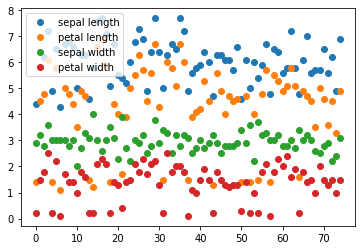

In [ ]:
# setosa_mask=(y_data_label==0)
# setosar_x=x_data[setosa_mask]

# versicolor_mask=(y_data_label==1)
# versicolor_x=x_data[versicolor_mask]

# virginica_mask=(y_data_label==2)
# virginica_x=x_data[virginica_mask]


plt.plot([x for x in x_data], marker='o', linestyle='')
# plt.plot([x for x in virginica_x], marker='o', linestyle='')

plt.legend(("sepal length","petal length","sepal width","petal width"))
plt.show()

## 3. 데이터 전처리
---

* y 데이터 값을 원-핫 벡터로 코딩합니다.
* 학습데이터와 테스트데이터를 분리합니다. 
  * sklearn.model_selection에서 제공하는 train_test_split 를 사용합니다.


### **One-hot 코딩**


In [ ]:
from tensorflow.keras.utils import to_categorical
y_data_onehot = to_categorical(y_data_label, num_classes=3)
print (y_data_onehot)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### **train-test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data_onehot)
y_train_onehot =y_data_onehot[:56]
y_train_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

## 4. 모델학습
---

* softmax regression을 사용하여 훈련하고, 테스트셋을 이용해 성능을 평가합니다.
* decision tree를 사용하여 훈련하고, 테스트셋을 이용해 성능을 평가합니다.
* 이 데이터셋에 적합한 세번째 모델을 찾아보고 훈련해 봅니다.

### **Softmax regression**

In [ ]:
import numpy as np

model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(learning_rate=0.01),
              metrics=[ 'acc' ])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Y_pred_onehot=model.predict(x_train)
print(x_train)

[[6.4 4.3 2.9 1.3]
 [5.  1.5 3.4 0.2]
 [4.9 4.5 2.5 1.7]
 [4.6 1.5 3.1 0.2]
 [6.  4.  2.2 1. ]
 [7.  4.7 3.2 1.4]
 [6.7 4.4 3.1 1.4]
 [7.7 6.7 2.8 2. ]
 [7.7 6.9 2.6 2.3]
 [5.2 3.9 2.7 1.4]
 [6.3 4.7 3.3 1.6]
 [5.6 4.5 3.  1.5]
 [5.6 4.9 2.8 2. ]
 [6.1 4.9 3.  1.8]
 [6.7 5.8 2.5 1.8]
 [4.8 1.4 3.  0.1]
 [4.7 1.3 3.2 0.2]
 [6.7 5.7 3.3 2.1]
 [6.  5.  2.2 1.5]
 [6.2 4.5 2.2 1.5]
 [6.5 4.6 2.8 1.5]
 [5.4 1.7 3.9 0.4]
 [6.5 5.8 3.  2.2]
 [5.7 3.5 2.6 1. ]
 [6.1 4.7 2.9 1.4]
 [6.4 4.5 3.2 1.5]
 [4.9 1.4 3.  0.2]
 [4.9 3.3 2.4 1. ]
 [5.8 1.2 4.  0.2]
 [7.6 6.6 3.  2.1]
 [6.6 4.6 2.9 1.3]
 [4.3 1.1 3.  0.1]
 [6.6 4.4 3.  1.4]
 [5.7 5.  2.5 2. ]
 [6.9 5.7 3.2 2.3]
 [5.6 3.6 2.9 1.3]
 [5.  1.4 3.6 0.2]
 [7.2 5.8 3.  1.6]
 [6.  4.5 2.9 1.5]
 [6.4 5.3 3.2 2.3]
 [5.7 4.5 2.8 1.3]
 [6.9 4.9 3.1 1.5]
 [6.4 5.3 2.7 1.9]
 [7.1 5.9 3.  2.1]
 [5.8 5.1 2.8 2.4]
 [4.6 1.4 3.4 0.3]
 [6.8 5.5 3.  2.1]
 [6.3 4.9 2.7 1.8]
 [6.8 4.8 2.8 1.4]
 [5.8 5.1 2.7 1.9]
 [7.2 6.1 3.6 2.5]
 [7.7 6.7 3.8 2.2]
 [5.5 4.  2.

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


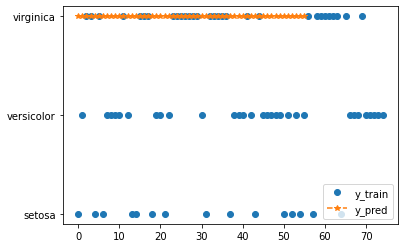

In [ ]:
Y_pred=[np.argmax(y_pred_onehot) for y_pred_onehot in Y_pred_onehot]
print(Y_pred)
plt.plot(y_data,marker='o',linestyle='')
plt.plot(Y_pred,marker='*',linestyle='--')
plt.legend(("y_train","y_pred"))
plt.show()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(learning_rate=0.01),
              metrics=[ 'acc' ])

In [ ]:
model.fit(x_train,y_train_onehot,epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 8ms/step - loss: 3.2795 - acc: 0.3750
Epoch 2/300
2/2 [==============================] - 0s 7ms/step - loss: 3.0133 - acc: 0.3929
Epoch 3/300
2/2 [==============================] - 0s 9ms/step - loss: 2.8596 - acc: 0.4286
Epoch 4/300
2/2 [==============================] - 0s 5ms/step - loss: 2.7494 - acc: 0.5179
Epoch 5/300
2/2 [==============================] - 0s 5ms/step - loss: 2.6324 - acc: 0.4643
Epoch 6/300
2/2 [==============================] - 0s 5ms/step - loss: 2.5181 - acc: 0.4821
Epoch 7/300
2/2 [==============================] - 0s 7ms/step - loss: 2.4068 - acc: 0.4464
Epoch 8/300
2/2 [==============================] - 0s 7ms/step - loss: 2.3022 - acc: 0.4643
Epoch 9/300
2/2 [==============================] - 0s 3ms/step - loss: 2.1898 - acc: 0.4643
Epoch 10/300
2/2 [==============================] - 0s 9ms/step - loss: 2.0820 - acc: 0.4464
Epoch 11/300
2/2 [==============================] - 0s 5ms/step - loss: 1.9754 

In [ ]:
Y_pred_onehot = model.predict(x_train)
Y_pred = [np.argmax(Y_pred_onehot) for Y_pred_onehot in Y_pred_onehot]
print(Y_pred)

[1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]


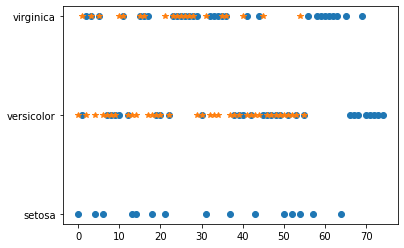

In [ ]:
plt.plot(y_data,marker='o',linestyle='')
plt.plot(Y_pred,marker='*',linestyle='')
plt.show()

### **Decision Tree**

[Text(200.88000000000002, 190.26, 'X[3] <= 1.65\ngini = 0.42\nsamples = 56\nvalue = [[46, 10]\n[34, 22]\n[32, 24]]'),
 Text(133.92000000000002, 135.9, 'X[1] <= 2.5\ngini = 0.328\nsamples = 34\nvalue = [[24, 10]\n[12, 22]\n[32, 2]]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 10\nvalue = [[0, 10]\n[10, 0]\n[10, 0]]'),
 Text(200.88000000000002, 81.53999999999999, 'X[1] <= 4.95\ngini = 0.102\nsamples = 24\nvalue = [[24, 0]\n[2, 22]\n[22, 2]]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 22\nvalue = [[22, 0]\n[0, 22]\n[22, 0]]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 22\nvalue = [[22, 0]\n[22, 0]\n[0, 22]]')]

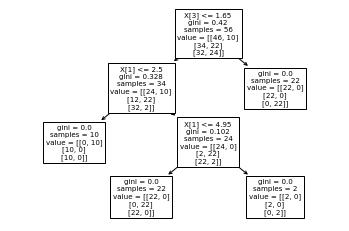

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
tree.plot_tree(dt)

### **내가찾은모델**

## 5. 모델 비교
---
* 어떤 모델이 가장 좋은지 간략히 브리핑 합니다.